<a href="https://colab.research.google.com/github/AMahadik/coursera-tflow/blob/master/HappySad.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Below is code with a link to a happy or sad dataset which contains 80 images, 40 happy and 40 sad. 
Create a convolutional neural network that trains to 100% accuracy on these images,  which cancels training upon hitting training accuracy of >.999

Hint -- it will work best with 3 convolutional layers.

In [3]:
import tensorflow as tf
import os
import zipfile


DESIRED_ACCURACY = 0.999

!wget --no-check-certificate \
    "https://storage.googleapis.com/laurencemoroney-blog.appspot.com/happy-or-sad.zip" \
    -O "/tmp/happy-or-sad.zip"

zip_ref = zipfile.ZipFile("/tmp/happy-or-sad.zip", 'r')
zip_ref.extractall("/tmp/h-or-s")
zip_ref.close()

class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('acc')>DESIRED_ACCURACY):
      print("\nReached DESIRED_ACCURACY, exiting")
      self.model.stop_training = True
  
          
callbacks = myCallback()

--2019-05-28 05:43:00--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/happy-or-sad.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.142.128, 2607:f8b0:400e:c09::80
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.142.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2670333 (2.5M) [application/zip]
Saving to: ‘/tmp/happy-or-sad.zip’

/tmp/happy-or-sad.z 100%[===================>]   2.55M  --.-KB/s    in 0.02s   

2019-05-28 05:43:00 (164 MB/s) - ‘/tmp/happy-or-sad.zip’ saved [2670333/2670333]



In [4]:
# Directory with happy faces
train_happy_dir = os.path.join('/tmp/h-or-s/happy')
train_happy_names = os.listdir(train_happy_dir)
print(train_happy_names[:10])
print('Total training happy images:', len(os.listdir(train_happy_dir)))
# Directory with sad faces
train_sad_dir = os.path.join('/tmp/h-or-s/sad')
train_sad_names = os.listdir(train_sad_dir)
print(train_sad_names[:10])
print('Total training sad images:', len(os.listdir(train_sad_dir)))

['happy2-17.png', 'happy1-14.png', 'happy2-12.png', 'happy2-05.png', 'happy2-14.png', 'happy1-09.png', 'happy1-15.png', 'happy2-18.png', 'happy2-08.png', 'happy1-02.png']
Total training happy images: 40
['sad2-13.png', 'sad1-13.png', 'sad1-12.png', 'sad1-19.png', 'sad2-07.png', 'sad2-03.png', 'sad2-04.png', 'sad1-09.png', 'sad1-11.png', 'sad2-09.png']
Total training sad images: 40


In [0]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

# Index for iterating over images
pic_index = 0

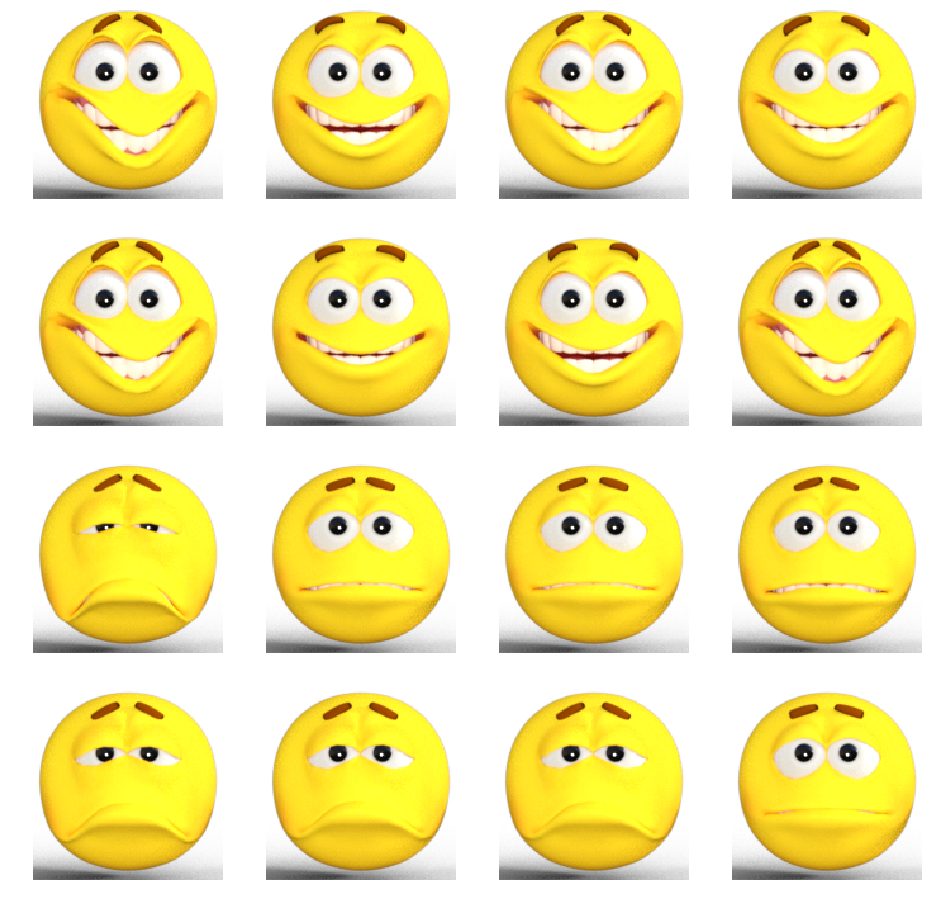

In [6]:
# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_happy_pix = [os.path.join(train_happy_dir, fname) 
                for fname in train_happy_names[pic_index-8:pic_index]]
next_sad_pix = [os.path.join(train_sad_dir, fname) 
                for fname in train_sad_names[pic_index-8:pic_index]]

for i, img_path in enumerate(next_happy_pix+next_sad_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

In [7]:
# This Code Block should Define and Compile the Model
model = tf.keras.models.Sequential([
# Your Code Here
    #First Convolution
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(300,300,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    #Second Convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    #Third Convolution
    tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    #Fifth Convolution
    tf.keras.layers.Conv2D(64,(3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    #Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    # Only 1 output neuron. 
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.summary()


Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 298, 298, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 149, 149, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 147, 147, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 73, 73, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 71, 71, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 35, 35, 64)        0         
_________________________________________________________________
conv

In [0]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss = 'binary_crossentropy', 
             optimizer=RMSprop(lr=0.001),
             metrics=['acc'])

In [9]:
# This code block should create an instance of an ImageDataGenerator called train_datagen 
# And a train_generator by calling train_datagen.flow_from_directory

from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1/255) # Your Code Here

train_generator = train_datagen.flow_from_directory(
    '/tmp/h-or-s/',
    target_size=(300,300),
    batch_size=128, #since we use binary_crossentropy loss, we need binary labels
    class_mode='binary')


# Expected output: 'Found 80 images belonging to 2 classes'

Found 80 images belonging to 2 classes.


In [10]:
# This code block should call model.fit_generator and train for
# a number of epochs. 
history = model.fit_generator(
    train_generator,
    steps_per_epoch=8,
    epochs=15,
    verbose=1)
    
# Expected output: "Reached 99.9% accuracy so cancelling training!""

Instructions for updating:
Use tf.cast instead.
Epoch 1/15
1/1 [==============================] - 10s 10s/step - loss: 0.6943 - acc: 0.5000
Epoch 2/15
1/1 [==============================] - 9s 9s/step - loss: 3.0068 - acc: 0.5000
Epoch 3/15
1/1 [==============================] - 8s 8s/step - loss: 2.5981 - acc: 0.5000
Epoch 4/15
1/1 [==============================] - 8s 8s/step - loss: 0.6986 - acc: 0.5000
Epoch 5/15
1/1 [==============================] - 9s 9s/step - loss: 0.7236 - acc: 0.5000
Epoch 6/15
1/1 [==============================] - 8s 8s/step - loss: 0.7280 - acc: 0.5000
Epoch 7/15
1/1 [==============================] - 8s 8s/step - loss: 0.6156 - acc: 0.5000
Epoch 8/15
1/1 [==============================] - 8s 8s/step - loss: 0.5299 - acc: 0.9500
Epoch 9/15
1/1 [==============================] - 8s 8s/step - loss: 0.3979 - acc: 0.9750
Epoch 10/15
1/1 [==============================] - 8s 8s/step - loss: 0.2898 - acc: 0.9250
Epoch 11/15
1/1 [==============================] 

In [16]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = '/content/' + fn
  img = image.load_img(path, target_size=(300, 300))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(classes[0])
  if classes[0]>0.5:
    print(fn + " is happy")
  else:
    print(fn + " is sad")

Saving images.jpeg to images (1).jpeg
[0.]
images.jpeg is sad


In [0]:
import os, signal
os.kill(os.getpid(), signal.SIGKILL)